In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

In [2]:
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
training_set = train_datagen.flow_from_directory(r'C:\Users\Rana\PycharmProjects\dogcat\cats_and_dogs_filtered\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\Rana\PycharmProjects\dogcat\cats_and_dogs_filtered\validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
print(test_set.class_indices)
class2index = test_set.class_indices

index2class = {v: k for k, v in class2index.items()}
print(index2class)

{'cats': 0, 'dogs': 1}
{0: 'cats', 1: 'dogs'}


In [11]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=1,
                                            verbose=1,
                                            factor=0.25,
                                            min_lr=0.000003)

In [31]:
model = classifier.fit(training_set,
                         epochs = 50,
                         validation_data = test_set,
                          callbacks=[learning_rate_reduction])

Epoch 1/50
63/63 [==============================] - 9s 135ms/step - loss: 0.3604 - accuracy: 0.8495 - val_loss: 0.5879 - val_accuracy: 0.7380 - lr: 0.0010
Epoch 2/50
63/63 [==============================] - 9s 137ms/step - loss: 0.3295 - accuracy: 0.8625 - val_loss: 0.6141 - val_accuracy: 0.7320 - lr: 0.0010
Epoch 3/50
63/63 [==============================] - 9s 137ms/step - loss: 0.3335 - accuracy: 0.8565 - val_loss: 0.6123 - val_accuracy: 0.7220 - lr: 0.0010
Epoch 4/50
63/63 [==============================] - 8s 130ms/step - loss: 0.3095 - accuracy: 0.8640 - val_loss: 0.6475 - val_accuracy: 0.7280 - lr: 0.0010
Epoch 5/50
63/63 [==============================] - 9s 138ms/step - loss: 0.3283 - accuracy: 0.8620 - val_loss: 0.6635 - val_accuracy: 0.7120 - lr: 0.0010
Epoch 6/50
63/63 [==============================] - 8s 122ms/step - loss: 0.3091 - accuracy: 0.8670 - val_loss: 0.6476 - val_accuracy: 0.7210 - lr: 0.0010
Epoch 7/50
63/63 [==============================] - 8s 132ms/step - lo

63/63 [==============================] - 8s 132ms/step - loss: 0.2365 - accuracy: 0.9020 - val_loss: 0.7277 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 22/50
63/63 [==============================] - 9s 141ms/step - loss: 0.2268 - accuracy: 0.9125 - val_loss: 0.7558 - val_accuracy: 0.7420 - lr: 0.0010
Epoch 23/50
63/63 [==============================] - 8s 126ms/step - loss: 0.2081 - accuracy: 0.9150 - val_loss: 0.8312 - val_accuracy: 0.7100 - lr: 0.0010
Epoch 24/50
63/63 [==============================] - 8s 133ms/step - loss: 0.2163 - accuracy: 0.9115 - val_loss: 0.8924 - val_accuracy: 0.7070 - lr: 0.0010
Epoch 25/50
63/63 [==============================] - 9s 135ms/step - loss: 0.2019 - accuracy: 0.9165 - val_loss: 0.8494 - val_accuracy: 0.7180 - lr: 0.0010
Epoch 26/50
63/63 [==============================] - 9s 138ms/step - loss: 0.1968 - accuracy: 0.9215 - val_loss: 0.7834 - val_accuracy: 0.7440 - lr: 0.0010
Epoch 27/50
63/63 [==============================] - 8s 130ms/step - loss: 0

63/63 [==============================] - 9s 137ms/step - loss: 0.1559 - accuracy: 0.9395 - val_loss: 0.8356 - val_accuracy: 0.7380 - lr: 0.0010
Epoch 42/50
63/63 [==============================] - 8s 133ms/step - loss: 0.1348 - accuracy: 0.9515 - val_loss: 0.8567 - val_accuracy: 0.7290 - lr: 0.0010
Epoch 43/50
63/63 [==============================] - 8s 133ms/step - loss: 0.1341 - accuracy: 0.9535 - val_loss: 0.9243 - val_accuracy: 0.7180 - lr: 0.0010
Epoch 44/50
63/63 [==============================] - 9s 136ms/step - loss: 0.1382 - accuracy: 0.9480 - val_loss: 1.0336 - val_accuracy: 0.7280 - lr: 0.0010
Epoch 45/50
63/63 [==============================] - 9s 139ms/step - loss: 0.1253 - accuracy: 0.9515 - val_loss: 0.9218 - val_accuracy: 0.7420 - lr: 0.0010
Epoch 46/50
63/63 [==============================] - 8s 133ms/step - loss: 0.1553 - accuracy: 0.9415 - val_loss: 0.9394 - val_accuracy: 0.7330 - lr: 0.0010
Epoch 47/50
63/63 [==============================] - 8s 132ms/step - loss: 0

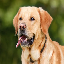

In [32]:
new_img = load_img(r"C:\Users\Rana\Downloads\dog_image.webp",target_size=(64,64,3))
new_img

In [33]:
np.array(new_img).shape

(64, 64, 3)

In [34]:
new_img =  np.expand_dims(new_img,axis=0)
new_img.shape

(1, 64, 64, 3)

In [42]:
if classifier.predict(new_img)[0][0]==1:
    print('dog')
else:
    print('cat')

dog
